In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

## Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('Merged_data.csv')
df.head(10)

,Model,Year,Mileage,Brand,Color,Body Type,Fuel Type,Seating Capacity,Seller Address,Seller Region,Price
0,HR-V,2018,42500,Honda,Grey,SUV,Pertamax,5,Bekasi,Jawa Barat,243000000
1,Yaris,2021,37500,Toyota,Red,Hatchback,Pertamax,5,Bogor,Jawa Barat,254000000
2,Ertiga,2017,112500,Suzuki,Black,MPV,Pertamax,7,Depok,Jawa Barat,153000000
3,March,2016,72500,Nissan,Black,Hatchback,Pertamax,5,Depok,Jawa Barat,104000000
4,GO+,2014,97500,Datsun,Silver,MPV,Pertamax,7,Depok,Jawa Barat,74000000
5,Xenia,2019,32500,Daihatsu,White,MPV,Pertamax,7,Bogor,Jawa Barat,168000000
6,Baleno,2019,12500,Suzuki,White,Hatchback,Pertamax,5,Depok,Jawa Barat,182000000
7,Ertiga,2022,22500,Suzuki,Black,MPV,Pertamax,7,Bogor,Jawa Barat,229000000
8,Sigra,2023,0,Daihatsu,Others,MPV,Pertamax,7,Depok,Jawa Barat,135200000
9,Sigra,2023,0,Daihatsu,Others,MPV,Pertamax,7,Depok,Jawa Barat,135200000


In [3]:
df.shape

(32366, 11)

In [4]:
df.columns

Index(['Model', 'Year', 'Mileage', 'Brand', 'Color', 'Body Type', 'Fuel Type',
       'Seating Capacity', 'Seller Address', 'Seller Region', 'Price'],
      dtype='object')

### Check total missing values

In [5]:
df.isna().sum()

Model                0
Year                 0
Mileage              0
Brand                0
Color                0
Body Type           21
Fuel Type           26
Seating Capacity     0
Seller Address       0
Seller Region        0
Price                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             32366 non-null  object
 1   Year              32366 non-null  int64 
 2   Mileage           32366 non-null  int64 
 3   Brand             32366 non-null  object
 4   Color             32366 non-null  object
 5   Body Type         32345 non-null  object
 6   Fuel Type         32340 non-null  object
 7   Seating Capacity  32366 non-null  int64 
 8   Seller Address    32366 non-null  object
 9   Seller Region     32366 non-null  object
 10  Price             32366 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


## Data Cleaning

In [7]:
df.drop(['Seller Address','Seating Capacity','Color','Body Type'], axis=1, inplace=True)

In [8]:
df.isna().sum()/df.shape[0]*100

Model            0.000000
Year             0.000000
Mileage          0.000000
Brand            0.000000
Fuel Type        0.080331
Seller Region    0.000000
Price            0.000000
dtype: float64

#### we can see that "Body Type" and "Fuel Type" column has less than 5% of null values. so we can simply drop these rows which have null values in these two columns.

In [9]:
df = df.dropna(subset=['Fuel Type'])

In [10]:
df.isna().sum()

Model            0
Year             0
Mileage          0
Brand            0
Fuel Type        0
Seller Region    0
Price            0
dtype: int64

In [11]:
df.duplicated().sum()

19110

In [12]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13230 entries, 0 to 32365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          13230 non-null  object
 1   Year           13230 non-null  int64 
 2   Mileage        13230 non-null  int64 
 3   Brand          13230 non-null  object
 4   Fuel Type      13230 non-null  object
 5   Seller Region  13230 non-null  object
 6   Price          13230 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 826.9+ KB


### Categorical Data Cleaning

In [14]:
Brand_values = df['Brand'].value_counts()

In [15]:
print(Brand_values)

Toyota              3450
Honda               1850
Mercedes-Benz       1348
Hyundai             1056
BMW                 1003
Suzuki               772
Daihatsu             758
Mitsubishi           602
Nissan               448
Mazda                277
Wuling               238
Lexus                219
MINI                 158
Land Rover           139
Porsche              109
Volkswagen            93
Chevrolet             87
Jeep                  86
Ford                  77
Isuzu                 73
KIA                   51
Audi                  49
Chery                 43
Datsun                33
Ferrari               22
Peugeot               18
Subaru                17
Tesla                 16
Lamborghini           14
Rolls-Royce           13
Jaguar                12
smart                  8
Hino                   7
Dodge                  6
McLaren                5
Tata                   5
DFSK                   5
Bentley                5
Maserati               5
Aston Martin           5


In [16]:
df['Brand'] = df['Brand'].apply(lambda x: x if str(x) in Brand_values[:20] else 'others')

In [17]:
model_values = df['Model'].value_counts()
print(model_values)

Kijang Innova    390
Brio             359
Avanza           359
HR-V             352
Xpander          300
                ... 
Vantage            1
RCZ                1
F-150              1
120i               1
Kuzer              1
Name: Model, Length: 545, dtype: int64


In [18]:
df['Model'] = df['Model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [19]:
for i in df.columns:
    print(i, len(df[i].value_counts().index))

Model 51
Year 42
Mileage 426
Brand 21
Fuel Type 7
Seller Region 3
Price 2615


### Numerical Data Cleaning

In [20]:
df.describe()

,Year,Mileage,Price
count,13230.000000,13230.000000,1.323000e+04
mean,2017.980952,41639.205518,5.892154e+08
std,5.008506,47065.779291,1.089544e+09
min,1975.000000,0.000000,1.530000e+07
25%,2015.000000,0.000000,1.780000e+08
50%,2019.000000,27500.000000,2.850000e+08
75%,2022.000000,67500.000000,5.900000e+08
max,2023.000000,999999.000000,1.900000e+10


In [21]:
price_percentile25 = df['Price'].quantile(0.25)
price_percentile75 = df['Price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [22]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['Price'].quantile(0.05)

In [23]:
new_df = df[(df['Price'] < price_upper_limit) & (df['Price'] > price_lower_limit)]

In [24]:
mileage_percentile25 = df['Mileage'].quantile(0.25)
mileage_percentile75 = df['Mileage'].quantile(0.75)
mileage_iqr = mileage_percentile75 - mileage_percentile25
mileage_upper_limit = mileage_percentile75 + 1.5 * mileage_iqr
mileage_lower_limit = df['Mileage'].quantile(0.05)

In [25]:
new_df = new_df[(new_df['Mileage'] < mileage_upper_limit) & (new_df['Mileage'] > mileage_lower_limit)]

In [26]:
new_df.shape

(8295, 7)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8295 entries, 0 to 32365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          8295 non-null   object
 1   Year           8295 non-null   int64 
 2   Mileage        8295 non-null   int64 
 3   Brand          8295 non-null   object
 4   Fuel Type      8295 non-null   object
 5   Seller Region  8295 non-null   object
 6   Price          8295 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 518.4+ KB


In [28]:
new_df.describe()

,Year,Mileage,Price
count,8295.000000,8295.000000,8.295000e+03
mean,2016.743701,52856.259554,3.541895e+08
std,3.751298,35808.399248,2.575536e+08
min,1975.000000,1.000000,1.019000e+08
25%,2015.000000,22500.000000,1.680000e+08
50%,2017.000000,47500.000000,2.450000e+08
75%,2019.000000,77500.000000,4.600000e+08
max,2023.000000,167500.000000,1.200000e+09


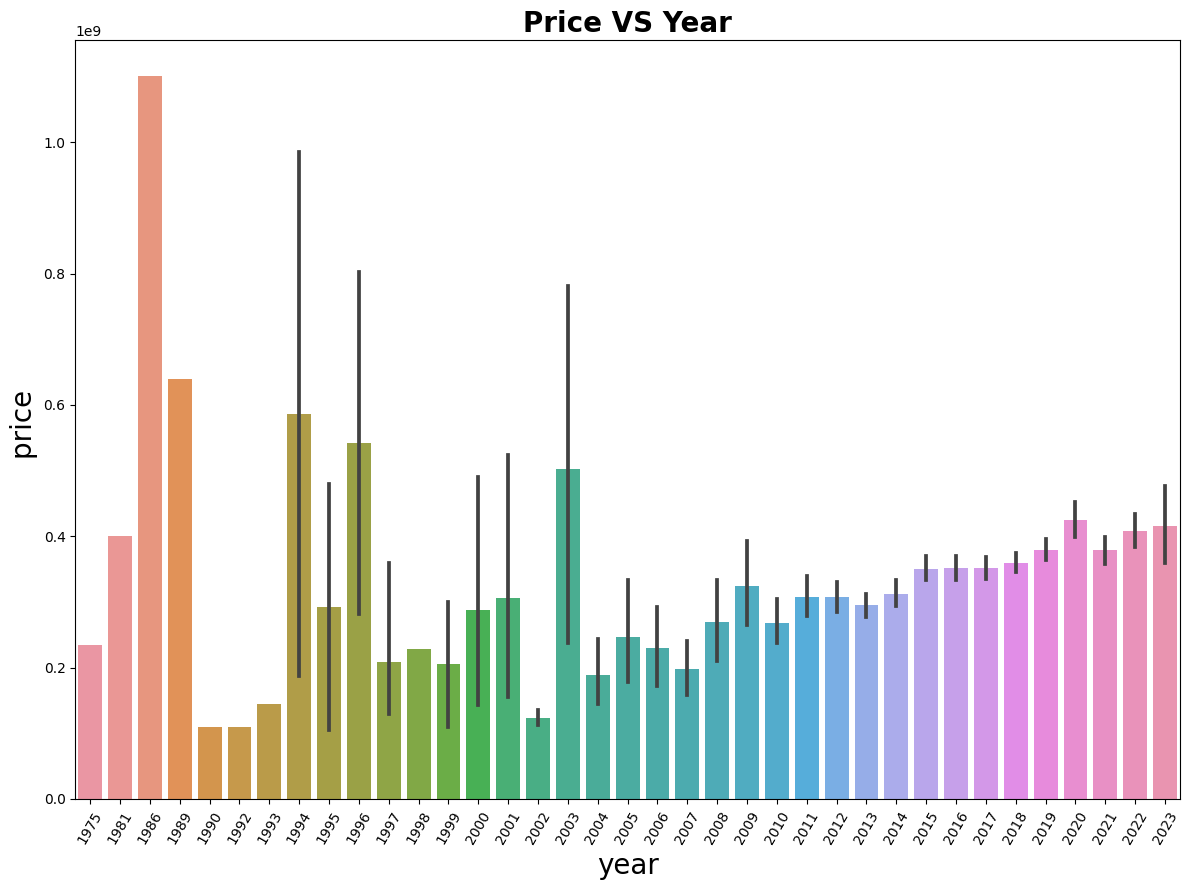

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=new_df['Price'],x=new_df['Year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

### the car data before 1997 quite irrelevant with our current times data. so we get the data after the 1997

In [30]:
new_df = new_df[new_df['Year'] > 1997]
new_df.shape

(8276, 7)

In [31]:
new_df['Car_age'] = 2023 - new_df['Year']
new_df.drop(['Year'], axis = 1, inplace = True)
new_df.describe()

,Mileage,Price,Car_age
count,8276.000000,8.276000e+03,8276.000000
mean,52759.779966,3.540564e+08,6.200338
std,35697.956624,2.573577e+08,3.558095
min,1.000000,1.019000e+08,0.000000
25%,22500.000000,1.680000e+08,4.000000
50%,47500.000000,2.450000e+08,6.000000
75%,77500.000000,4.600000e+08,8.000000
max,167500.000000,1.200000e+09,25.000000


## Data Visualization

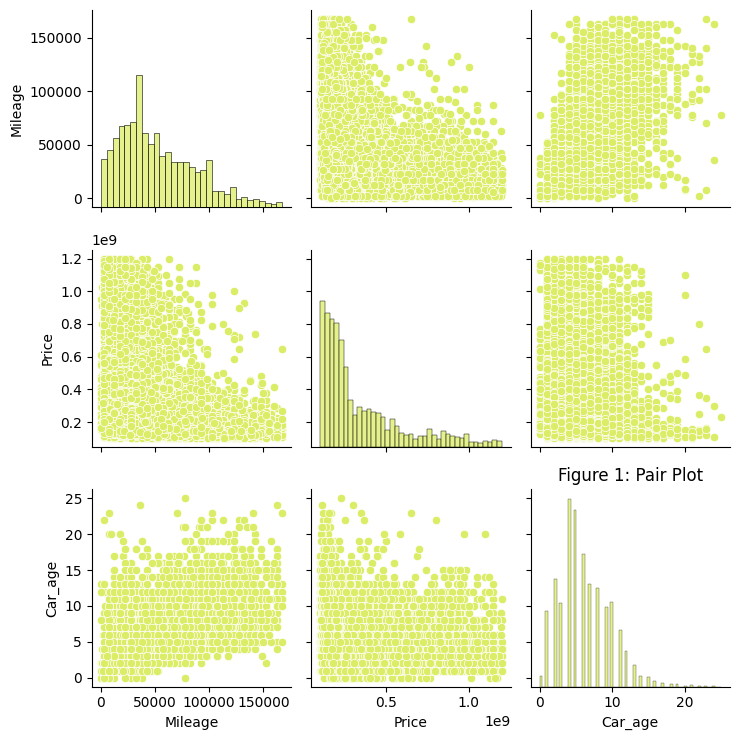

In [32]:
sns.pairplot(new_df)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

C:\Users\Achmad Budi\AppData\Local\Temp\ipykernel_22520\822199912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True)


<Axes: >

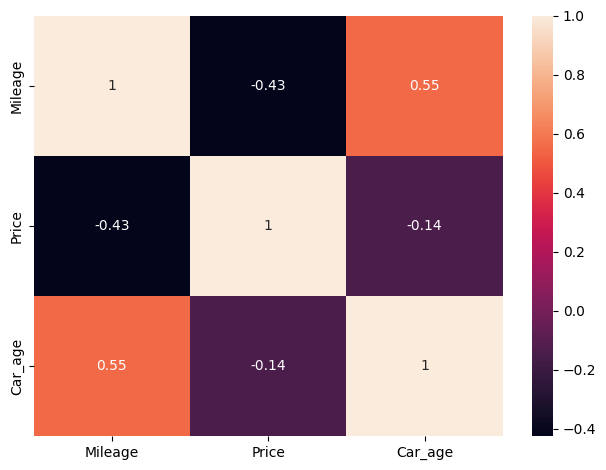

In [33]:
sns.heatmap(new_df.corr(), annot=True)

C:\Users\Achmad Budi\AppData\Local\Temp\ipykernel_22520\2295887835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df.Price)


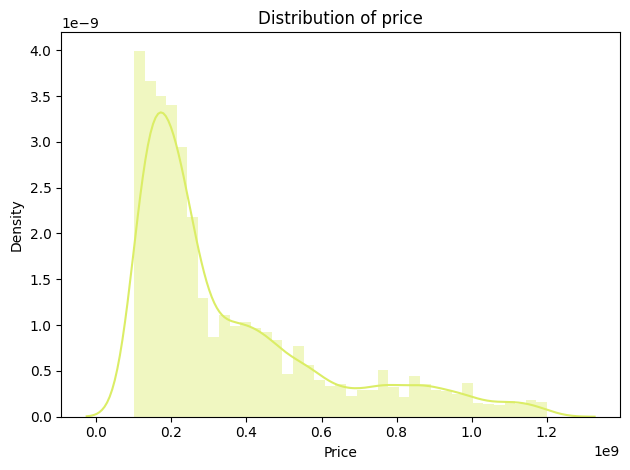

In [34]:
sns.distplot(new_df.Price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

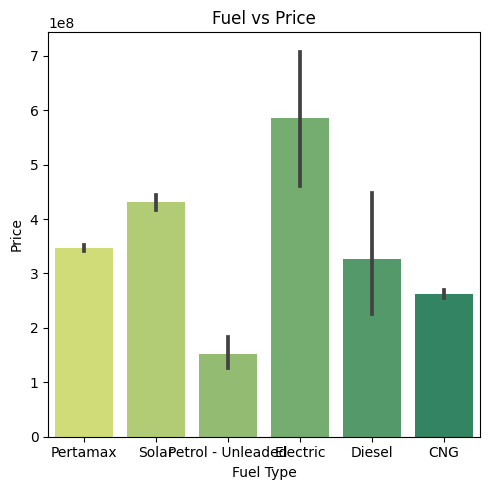

In [35]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='Fuel Type',y='Price',data=new_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

## Data Preprocessing

In [36]:
new_df.columns

Index(['Model', 'Mileage', 'Brand', 'Fuel Type', 'Seller Region', 'Price',
       'Car_age'],
      dtype='object')

In [37]:
final_df = new_df.copy()

### Creating encoder and implimenting then into pipeline

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe_categorical = Pipeline(
    steps = [('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

In [40]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [41]:
column_transformer = ColumnTransformer(transformers = [
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['Model', 'Brand', 'Fuel Type', 'Seller Region']),
    ('numerical_pipe_trans', pipe_numerical, ['Mileage'])
])

In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 0 to 32365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          8276 non-null   object
 1   Mileage        8276 non-null   int64 
 2   Brand          8276 non-null   object
 3   Fuel Type      8276 non-null   object
 4   Seller Region  8276 non-null   object
 5   Price          8276 non-null   int64 
 6   Car_age        8276 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 517.2+ KB


### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['Price'], axis = 1), final_df['Price'], random_state = 42, test_size = .2)

In [45]:
X_train_tnf = column_transformer.fit_transform(X_train)

C:\Users\Achmad Budi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
X_test_tnf = column_transformer.transform(X_test)

In [47]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(6620, 78)
(1656, 78)


# Model Training

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [49]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

### Linear Regression

In [50]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)

In [51]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.7240
Mean squared error:  18893427617803428.00
Mean absolute error:  95641719.67
Root mean squared error:  137453365.25


### Ridge Regression

In [52]:
RR = Ridge(alpha=20.336, solver='auto')
RR.fit(X_train_tnf, y_train)
y_pred = RR.predict(X_test_tnf)

In [53]:
score_rr = result(y_test, y_pred)
score_data['Ridge Regression'] = score_rr
print('R2 score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

R2 score:  0.7010
Mean squared error:  20467453931430424.00
Mean absolute error:  101858364.62
Root mean squared error:  143064509.69


### K-Nearest Neighbour

In [54]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train_tnf, y_train)
y_pred = KNN.predict(X_test_tnf)

In [55]:
score_knn = result(y_test, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.7597
Mean squared error:  16451080854632300.00
Mean absolute error:  75338409.88
Root mean squared error:  128261766.92


### Random Forest Regression

In [56]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred = RFR.predict(X_test_tnf)

In [57]:
score_rfr = result(y_test, y_pred)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.7600
Mean squared error:  16429118529527090.00
Mean absolute error:  75433192.76
Root mean squared error:  128176123.09


### Bagging Regressor

In [58]:
baggReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train_tnf, y_train)
y_pred = baggReg.predict(X_test_tnf)

In [59]:
score_bagg = result(y_test, y_pred)
score_data['Bagging Regressor'] = score_bagg
print('R2 score: ', score_bagg[0])
print('Mean squared error: ', score_bagg[2])
print('Mean absolute error: ', score_bagg[3])
print('Root mean squared error: ', score_bagg[4])

R2 score:  0.7198
Mean squared error:  19180369437659580.00
Mean absolute error:  80825695.02
Root mean squared error:  138493210.80


### Lasso Regression

In [60]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_tnf, y_train)
y_pred = lasso.predict(X_test_tnf)

In [61]:
score_lasso = result(y_test, y_pred)
score_data['Lasso Regression'] = score_lasso
print('R2 score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2 score:  0.7240
Mean squared error:  18894091008175236.00
Mean absolute error:  95654992.99
Root mean squared error:  137455778.37


### AdaBoost Regressor

In [62]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
ABR.fit(X_train_tnf, y_train)
y_pred = ABR.predict(X_test_tnf)

In [63]:
score_abr = result(y_test, y_pred)
score_data['AdaBoost Regressor'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.7423
Mean squared error:  17641181789913988.00
Mean absolute error:  76372467.95
Root mean squared error:  132820110.64


XGBoost Regressor

In [64]:
XGB = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
XGB.fit(X_train_tnf, y_train)
y_pred = XGB.predict(X_test_tnf)

In [65]:
score_xgb = result(y_test, y_pred)
score_data['XGBoost Regressor'] = score_xgb
print('R2 score: ', score_xgb[0])
print('Mean squared error: ', score_xgb[2])
print('Mean absolute error: ', score_xgb[3])
print('Root mean squared error: ', score_xgb[4])

R2 score:  0.7296
Mean squared error:  18508365603068944.00
Mean absolute error:  79085311.77
Root mean squared error:  136045454.18


### Light GBM Regressor

In [66]:
LGB = lgb.LGBMRegressor()
LGB.fit(X_train_tnf, y_train)
y_pred = LGB.predict(X_test_tnf)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 68
[LightGBM] [Info] Start training from score 353938851.919033


In [67]:
score_lgb = result(y_test, y_pred)
score_data['Light GBM Regressor'] = score_lgb
print('R2 score: ', score_lgb[0])
print('Mean squared error: ', score_lgb[2])
print('Mean absolute error: ', score_lgb[3])
print('Root mean squared error: ', score_lgb[4])

R2 score:  0.7865
Mean squared error:  14618972245591624.00
Mean absolute error:  74343814.76
Root mean squared error:  120908941.96


### Decision Tree Regressor

In [68]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train_tnf, y_train)
y_pred = DTR.predict(X_test_tnf)

In [69]:
score_dtr = result(y_test, y_pred)
score_data['Decision Tree Regressor'] = score_dtr
print('R2 score: ', score_dtr[0])
print('Mean squared error: ', score_dtr[2])
print('Mean absolute error: ', score_dtr[3])
print('Root mean squared error: ', score_dtr[4])

R2 score:  0.7147
Mean squared error:  19531986328586684.00
Mean absolute error:  79945597.37
Root mean squared error:  139756882.94


## Overall result and Model Selection

In [70]:
score_data

,Linear Regression,Ridge Regression,K-Nearest Neighbour,Random Forest Regression,Bagging Regressor,Lasso Regression,AdaBoost Regressor,XGBoost Regressor,Light GBM Regressor,Decision Tree Regressor
R2 Score,0.7240,0.7010,0.7597,0.7600,0.7198,0.7240,0.7423,0.7296,0.7865,0.7147
Accuracy(%),72.4017,70.1025,75.9694,76.0014,71.9826,72.4008,74.2309,72.9642,78.6456,71.4690
Mean Squared Error,18893427617803428.00,20467453931430424.00,16451080854632300.00,16429118529527090.00,19180369437659580.00,18894091008175236.00,17641181789913988.00,18508365603068944.00,14618972245591624.00,19531986328586684.00
Mean Absolute Error,95641719.67,101858364.62,75338409.88,75433192.76,80825695.02,95654992.99,76372467.95,79085311.77,74343814.76,79945597.37
Root MSE,137453365.25,143064509.69,128261766.92,128176123.09,138493210.80,137455778.37,132820110.64,136045454.18,120908941.96,139756882.94


In [71]:
for i in score_data.columns:
  score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']

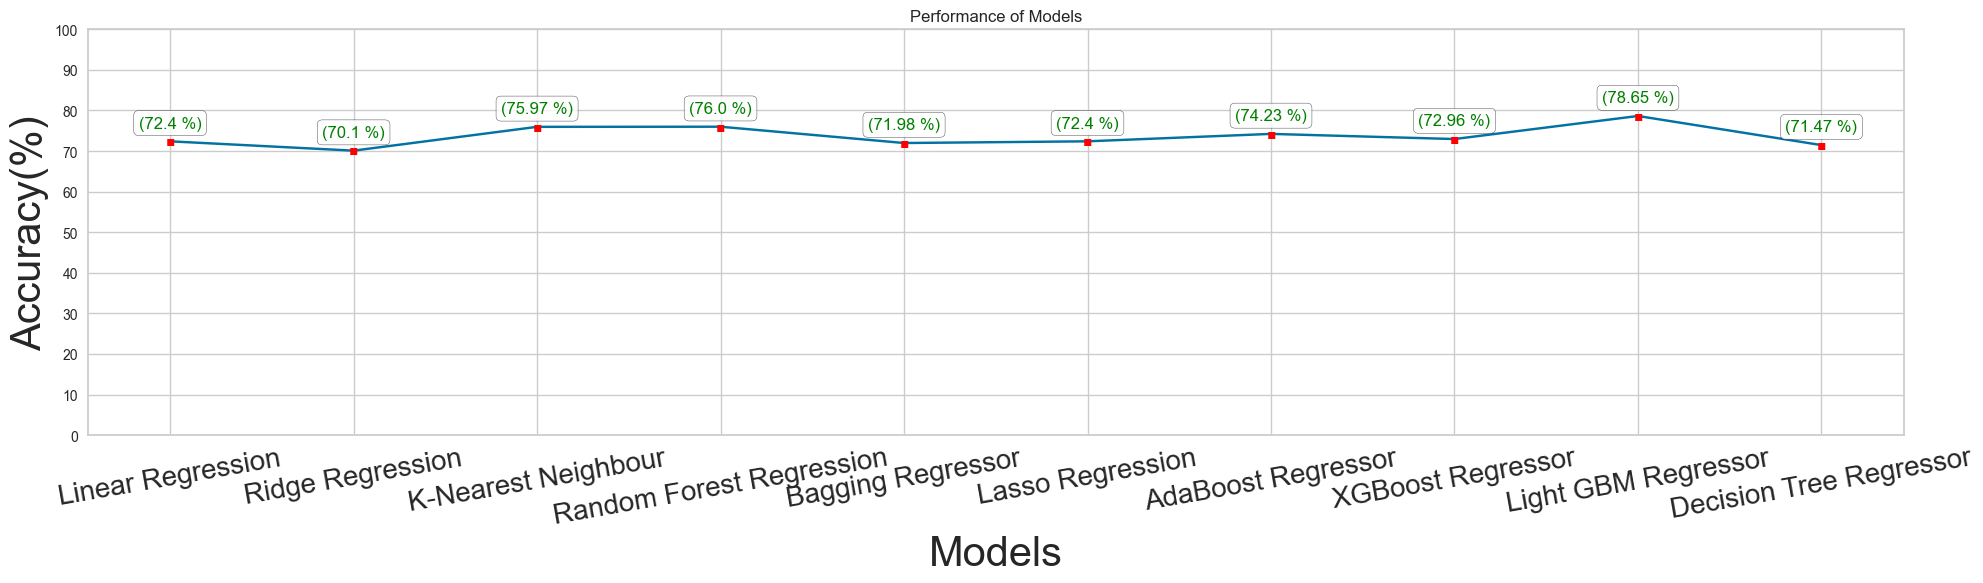

In [72]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

### Dipilih Model Random Forest Regression atau Light GBM Regressor

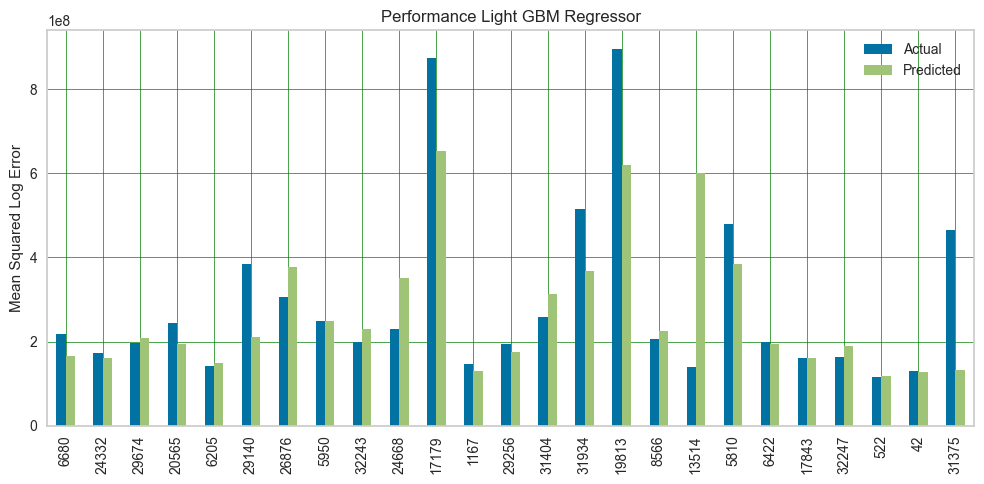

In [75]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance Light GBM Regressor')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Light-GBM-Regressor-Performance.jpg')
plt.show()

## Input New Data

In [147]:
new_data_test = {'Model':['Avanza'],
                'Year':[2011],
                'Mileage':[60000],
                'Brand':['Toyota'],
                'Color':['Yellow'],
                'Body Type':['SUV'],
                'Fuel Type':['Pertamax'],
                'Seating Capacity':[7],
                'Seller Address':['Bandung'],
                'Seller Region':['Jawa Barat']}

In [148]:
new_data_test_df = pd.DataFrame(new_data_test)
# new_data_test_reshape = new_data_test_array.reshape(1,-1)

In [149]:
new_data_test_df

,Model,Year,Mileage,Brand,Color,Body Type,Fuel Type,Seating Capacity,Seller Address,Seller Region
0,Avanza,2011,60000,Toyota,Yellow,SUV,Pertamax,7,Bandung,Jawa Barat


In [150]:
new_data_test_tnf = column_transformer.transform(new_data_test_df)

In [151]:
pd.DataFrame(new_data_test_tnf).shape

(1, 78)

In [152]:
y_pred_new = LGB.predict(new_data_test_tnf)

In [153]:
y_pred_new

array([1.63506305e+08])

## Export Model Machine Learning

In [154]:
import pickle

In [155]:
pickle.dump(LGB, open('Light_GBM_Regressor.pkl','wb'))